# Regression Model using FFNN
Tasks being carried out:
- Understanding the data
- Exploratory data analysis
- Divide the data into train and test
- Building NN model
- Compile the model
- Fit the model on training data set (by taking validation data separately out of training data)
- Check whether there is an overfit by comparing training loss and validation loss
- Plot the loss
- If there is an overfit, try to overcome using some regularization technique


In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

# Data Exploration 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print(boston.data.shape)   # To get numbers of features 

(506, 13)


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We need to load and print the dataset inorder to examine it. 

In [5]:
data = pd.DataFrame(boston.data, columns= boston.feature_names)  
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# For some reason, loading the data doesnt include target variable. So we need to add it here. 

data['MEDV'] = pd.Series(boston.target, index= data.index)

In [7]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# TRAIN TEST MODELS of 70% and 30% 
train_dataset = data.sample(frac= 0.7, random_state=0)
test_dataset = data.drop(train_dataset.index)

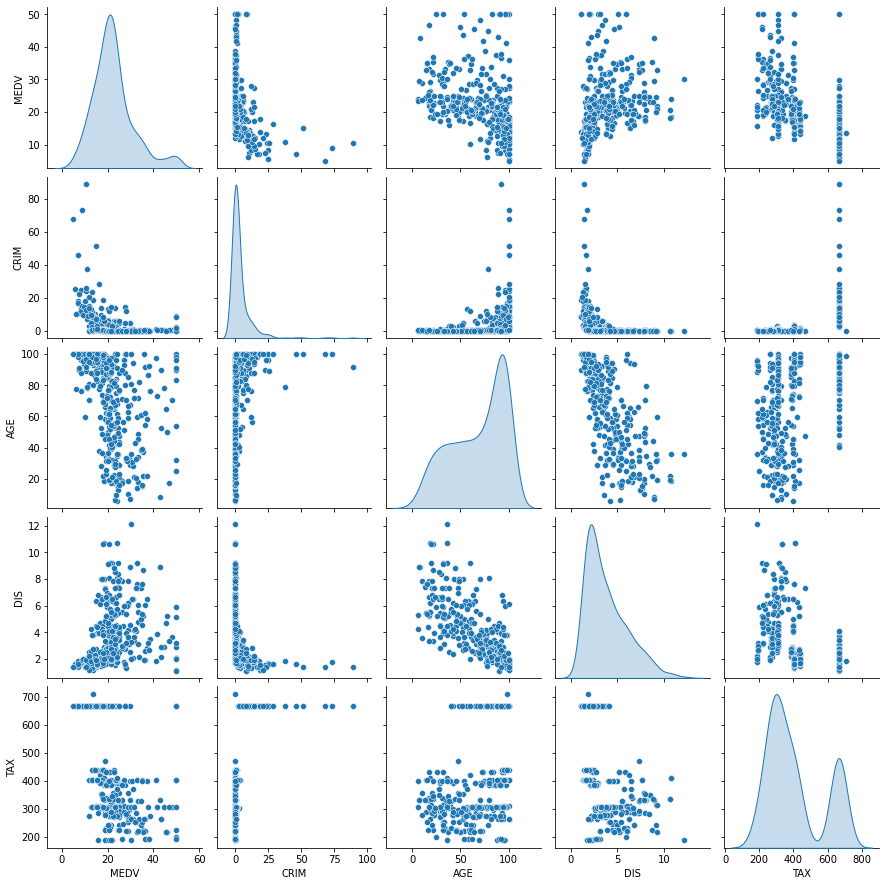

In [10]:
sns.pairplot(train_dataset[['MEDV', 'CRIM', 'AGE', 'DIS', 'TAX']], diag_kind='kde')

In [11]:
train_stats = train_dataset.describe()

In [12]:
train_stats.pop('MEDV')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


In [13]:
# SPLIT FEATURES FROM LABELS
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

## Normalize the data
Look again at the train_stats block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.


In [14]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

The normalised data is what we will be using to train the model. 

# Building the Neural Netword Model 

In [15]:
def build_model() : 
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = [len(train_dataset.keys())]),  # First dense layer with input len(train_dataset.keys())  ie, 13 here. 
        layers.Dense(64, activation = 'relu'),   # Second dense layer 
        
        layers.Dense(1)   # Output layer
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)    # Default learning rate = 0.001
    
    model.compile(loss = 'mse', 
                 optimizer = optimizer, # Helps to achive optimal minima. usually GD is used, but SGD, Adam optimizer etc is used. 
                 metrics = ['mae', 'mse', 'mape'])
    return model

Inspect the model 

In [16]:
model = build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Train the model
Train the model for 1000 epochs, and record the training and validation accuracy in the history object.

Note the validation_split set to use 20% of the training data as validation set and the remainder as calibration. Important to note that this is separate from the testing data that we do not touch in the model-training.


In [18]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 ==0 :
            print('')
        print('.', end = '')
        
EPOCHS = 1000

history = model.fit(
normed_train_data, train_labels, 
epochs=EPOCHS, validation_split=0.2, verbose= 1, callbacks = [PrintDot()])

Epoch 1/1000
9/9 [==============================] - 0s 15ms/step - loss: 530.3383 - mae: 21.4714 - mse: 530.3383 - mape: 98.1507 - val_loss: 616.3123 - val_mae: 22.9383 - val_mse: 616.3123 - val_mape: 93.7940

.Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 475.4136 - mae: 20.1889 - mse: 475.4136 - mape: 91.2142 - val_loss: 557.4843 - val_mae: 21.6168 - val_mse: 557.4843 - val_mape: 86.6648
.Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 418.9471 - mae: 18.7589 - mse: 418.9471 - mape: 83.7293 - val_loss: 491.1171 - val_mae: 20.1219 - val_mse: 491.1171 - val_mape: 80.1597
.Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 356.5796 - mae: 17.0560 - mse: 356.5796 - mape: 74.9415 - val_loss: 416.4294 - val_mae: 18.4112 - val_mse: 416.4294 - val_mape: 73.7695
.Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 292.8262 - mae: 15.1548 - mse: 292.8262 - mape: 65.8396 - val_loss: 344.4510 - val_mae: 16

.Epoch 41/1000
9/9 [==============================] - 0s 2ms/step - loss: 13.5900 - mae: 2.5776 - mse: 13.5900 - mape: 12.9451 - val_loss: 8.5141 - val_mae: 2.1309 - val_mse: 8.5141 - val_mape: 9.7933
.Epoch 42/1000
9/9 [==============================] - 0s 2ms/step - loss: 13.8036 - mae: 2.5188 - mse: 13.8036 - mape: 12.3359 - val_loss: 8.9935 - val_mae: 2.2040 - val_mse: 8.9935 - val_mape: 10.3435
.Epoch 43/1000
9/9 [==============================] - 0s 2ms/step - loss: 13.1367 - mae: 2.4828 - mse: 13.1367 - mape: 12.3456 - val_loss: 8.2228 - val_mae: 2.0892 - val_mse: 8.2228 - val_mape: 9.5515
.Epoch 44/1000
9/9 [==============================] - 0s 2ms/step - loss: 13.3080 - mae: 2.4686 - mse: 13.3080 - mape: 11.9207 - val_loss: 8.6080 - val_mae: 2.1810 - val_mse: 8.6080 - val_mape: 10.6511
.Epoch 45/1000
9/9 [==============================] - 0s 2ms/step - loss: 12.8140 - mae: 2.4237 - mse: 12.8140 - mape: 11.9128 - val_loss: 8.2713 - val_mae: 2.1451 - val_mse: 8.2713 - val_mape: 

.Epoch 82/1000
9/9 [==============================] - 0s 2ms/step - loss: 9.3334 - mae: 2.0565 - mse: 9.3334 - mape: 9.9986 - val_loss: 7.0797 - val_mae: 2.0729 - val_mse: 7.0797 - val_mape: 9.6819
.Epoch 83/1000
9/9 [==============================] - 0s 2ms/step - loss: 9.3702 - mae: 2.0886 - mse: 9.3702 - mape: 10.2433 - val_loss: 5.8733 - val_mae: 1.8590 - val_mse: 5.8733 - val_mape: 8.4188
.Epoch 84/1000
9/9 [==============================] - 0s 2ms/step - loss: 9.0951 - mae: 2.0448 - mse: 9.0951 - mape: 9.9279 - val_loss: 6.1197 - val_mae: 1.9165 - val_mse: 6.1197 - val_mape: 8.9513
.Epoch 85/1000
9/9 [==============================] - 0s 2ms/step - loss: 8.8527 - mae: 2.0255 - mse: 8.8527 - mape: 9.7394 - val_loss: 6.7224 - val_mae: 2.0271 - val_mse: 6.7224 - val_mape: 9.9641
.Epoch 86/1000
9/9 [==============================] - 0s 2ms/step - loss: 9.4149 - mae: 2.0956 - mse: 9.4149 - mape: 10.4215 - val_loss: 6.0778 - val_mae: 1.9314 - val_mse: 6.0778 - val_mape: 9.0920
.Epoch 8

9/9 [==============================] - 0s 2ms/step - loss: 5.7862 - mae: 1.6814 - mse: 5.7862 - mape: 8.2367 - val_loss: 9.2705 - val_mae: 2.2889 - val_mse: 9.2705 - val_mape: 13.1709
.Epoch 165/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.7614 - mae: 1.6256 - mse: 5.7614 - mape: 7.9847 - val_loss: 9.2140 - val_mae: 2.2149 - val_mse: 9.2140 - val_mape: 13.4222
.Epoch 166/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.5930 - mae: 1.6200 - mse: 5.5930 - mape: 7.9963 - val_loss: 8.1318 - val_mae: 2.1348 - val_mse: 8.1318 - val_mape: 12.4733
.Epoch 167/1000
9/9 [==============================] - 0s 3ms/step - loss: 5.5146 - mae: 1.5964 - mse: 5.5146 - mape: 7.7883 - val_loss: 7.9612 - val_mae: 2.1100 - val_mse: 7.9612 - val_mape: 12.4403
.Epoch 168/1000
9/9 [==============================] - 0s 2ms/step - loss: 5.5140 - mae: 1.6128 - mse: 5.5140 - mape: 7.8516 - val_loss: 8.3234 - val_mae: 2.1169 - val_mse: 8.3234 - val_mape: 12.6516
.Epoch 169/1000


.Epoch 205/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.5252 - mae: 1.5054 - mse: 4.5252 - mape: 7.6407 - val_loss: 10.5953 - val_mae: 2.2129 - val_mse: 10.5953 - val_mape: 13.7812
.Epoch 206/1000
9/9 [==============================] - 0s 3ms/step - loss: 4.3683 - mae: 1.4433 - mse: 4.3683 - mape: 7.0783 - val_loss: 10.0387 - val_mae: 2.2300 - val_mse: 10.0387 - val_mape: 13.5399
.Epoch 207/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.5701 - mae: 1.4811 - mse: 4.5701 - mape: 7.2359 - val_loss: 13.5487 - val_mae: 2.4306 - val_mse: 13.5487 - val_mape: 16.2363
.Epoch 208/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.4990 - mae: 1.4772 - mse: 4.4990 - mape: 7.2789 - val_loss: 11.6523 - val_mae: 2.3023 - val_mse: 11.6523 - val_mape: 14.8566
.Epoch 209/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.3940 - mae: 1.4348 - mse: 4.3940 - mape: 7.0402 - val_loss: 11.0001 - val_mae: 2.2196 - val_mse: 11.0001 - val_mape

.Epoch 286/1000
9/9 [==============================] - 0s 3ms/step - loss: 3.0935 - mae: 1.2470 - mse: 3.0935 - mape: 6.3357 - val_loss: 16.0565 - val_mae: 2.3878 - val_mse: 16.0565 - val_mape: 16.0402
.Epoch 287/1000
9/9 [==============================] - 0s 2ms/step - loss: 3.1917 - mae: 1.3013 - mse: 3.1917 - mape: 6.5199 - val_loss: 19.1003 - val_mae: 2.5290 - val_mse: 19.1003 - val_mape: 17.7665
.Epoch 288/1000
9/9 [==============================] - 0s 2ms/step - loss: 3.0235 - mae: 1.2121 - mse: 3.0235 - mape: 6.1236 - val_loss: 17.9237 - val_mae: 2.4954 - val_mse: 17.9237 - val_mape: 17.2112
.Epoch 289/1000
9/9 [==============================] - 0s 2ms/step - loss: 3.1803 - mae: 1.2338 - mse: 3.1803 - mape: 6.2693 - val_loss: 16.5970 - val_mae: 2.4085 - val_mse: 16.5970 - val_mape: 16.1556
.Epoch 290/1000
9/9 [==============================] - 0s 2ms/step - loss: 2.9087 - mae: 1.1766 - mse: 2.9087 - mape: 5.8949 - val_loss: 17.0464 - val_mae: 2.4335 - val_mse: 17.0464 - val_mape

.Epoch 367/1000
9/9 [==============================] - 0s 3ms/step - loss: 2.2484 - mae: 1.0802 - mse: 2.2484 - mape: 5.3042 - val_loss: 25.2629 - val_mae: 2.6865 - val_mse: 25.2629 - val_mape: 19.5251
.Epoch 368/1000
9/9 [==============================] - 0s 3ms/step - loss: 2.2429 - mae: 1.0599 - mse: 2.2429 - mape: 5.2948 - val_loss: 22.5665 - val_mae: 2.6067 - val_mse: 22.5665 - val_mape: 18.0634
.Epoch 369/1000
9/9 [==============================] - 0s 3ms/step - loss: 2.4287 - mae: 1.0758 - mse: 2.4287 - mape: 5.4449 - val_loss: 22.0050 - val_mae: 2.5006 - val_mse: 22.0050 - val_mape: 17.4417
.Epoch 370/1000
9/9 [==============================] - 0s 4ms/step - loss: 2.2937 - mae: 1.0428 - mse: 2.2937 - mape: 5.2255 - val_loss: 21.7681 - val_mae: 2.4984 - val_mse: 21.7681 - val_mape: 17.3871
.Epoch 371/1000
9/9 [==============================] - 0s 3ms/step - loss: 2.1307 - mae: 1.0270 - mse: 2.1307 - mape: 5.1260 - val_loss: 22.1836 - val_mae: 2.5606 - val_mse: 22.1836 - val_mape

.Epoch 448/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.6168 - mae: 0.9031 - mse: 1.6168 - mape: 4.3877 - val_loss: 29.5612 - val_mae: 2.7333 - val_mse: 29.5612 - val_mape: 20.1324
.Epoch 449/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.8664 - mae: 0.9394 - mse: 1.8664 - mape: 4.6229 - val_loss: 29.3928 - val_mae: 2.7111 - val_mse: 29.3928 - val_mape: 19.9158
.Epoch 450/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.6536 - mae: 0.8848 - mse: 1.6536 - mape: 4.4295 - val_loss: 33.2992 - val_mae: 2.9480 - val_mse: 33.2992 - val_mape: 22.0787
.Epoch 451/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.6436 - mae: 0.8817 - mse: 1.6436 - mape: 4.4962 - val_loss: 29.7202 - val_mae: 2.7505 - val_mse: 29.7202 - val_mape: 20.0872
.Epoch 452/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.6006 - mae: 0.8946 - mse: 1.6006 - mape: 4.5321 - val_loss: 31.0402 - val_mae: 2.8010 - val_mse: 31.0402 - val_mape

.Epoch 529/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.3197 - mae: 0.7804 - mse: 1.3197 - mape: 3.9053 - val_loss: 33.1674 - val_mae: 2.8565 - val_mse: 33.1674 - val_mape: 21.0689
.Epoch 530/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.4794 - mae: 0.8570 - mse: 1.4794 - mape: 4.2584 - val_loss: 37.1820 - val_mae: 3.0758 - val_mse: 37.1820 - val_mape: 22.9906
.Epoch 531/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.2532 - mae: 0.7852 - mse: 1.2532 - mape: 4.0756 - val_loss: 33.9603 - val_mae: 2.7583 - val_mse: 33.9603 - val_mape: 20.8667
.Epoch 532/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.3253 - mae: 0.7956 - mse: 1.3253 - mape: 3.9902 - val_loss: 35.3841 - val_mae: 2.9311 - val_mse: 35.3841 - val_mape: 22.0629
.Epoch 533/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.3363 - mae: 0.8306 - mse: 1.3363 - mape: 4.2617 - val_loss: 33.0163 - val_mae: 2.7820 - val_mse: 33.0163 - val_mape

.Epoch 610/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.9948 - mae: 0.6852 - mse: 0.9948 - mape: 3.4148 - val_loss: 31.8045 - val_mae: 2.7520 - val_mse: 31.8045 - val_mape: 20.5333
.Epoch 611/1000
9/9 [==============================] - 0s 2ms/step - loss: 1.2830 - mae: 0.8205 - mse: 1.2830 - mape: 4.0536 - val_loss: 34.7007 - val_mae: 2.9880 - val_mse: 34.7007 - val_mape: 22.6577
.Epoch 612/1000
9/9 [==============================] - 0s 2ms/step - loss: 1.1662 - mae: 0.7371 - mse: 1.1662 - mape: 3.5756 - val_loss: 32.6992 - val_mae: 2.8477 - val_mse: 32.6992 - val_mape: 21.3429
.Epoch 613/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.0769 - mae: 0.7535 - mse: 1.0769 - mape: 3.9022 - val_loss: 31.7470 - val_mae: 2.7927 - val_mse: 31.7470 - val_mape: 20.8109
.Epoch 614/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.0700 - mae: 0.7484 - mse: 1.0700 - mape: 3.7915 - val_loss: 32.4591 - val_mae: 2.8660 - val_mse: 32.4591 - val_mape

.Epoch 691/1000
9/9 [==============================] - 0s 2ms/step - loss: 1.0599 - mae: 0.7401 - mse: 1.0599 - mape: 3.7567 - val_loss: 34.1284 - val_mae: 2.9398 - val_mse: 34.1284 - val_mape: 22.3171
.Epoch 692/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8108 - mae: 0.6276 - mse: 0.8108 - mape: 3.2100 - val_loss: 30.7646 - val_mae: 2.8399 - val_mse: 30.7646 - val_mape: 20.8887
.Epoch 693/1000
9/9 [==============================] - ETA: 0s - loss: 1.7641 - mae: 0.9095 - mse: 1.7641 - mape: 4.48 - 0s 3ms/step - loss: 0.9267 - mae: 0.6903 - mse: 0.9267 - mape: 3.4872 - val_loss: 30.3144 - val_mae: 2.8778 - val_mse: 30.3144 - val_mape: 21.0294
.Epoch 694/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.9978 - mae: 0.7040 - mse: 0.9978 - mape: 3.5389 - val_loss: 35.8747 - val_mae: 3.1385 - val_mse: 35.8747 - val_mape: 23.9163
.Epoch 695/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.8317 - mae: 0.6313 - mse: 0.8317 - mape: 3.1937 -

.Epoch 731/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7722 - mae: 0.6034 - mse: 0.7722 - mape: 3.0007 - val_loss: 32.5615 - val_mae: 2.9384 - val_mse: 32.5615 - val_mape: 22.0737
.Epoch 732/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.9450 - mae: 0.6976 - mse: 0.9450 - mape: 3.7053 - val_loss: 35.2224 - val_mae: 3.2088 - val_mse: 35.2224 - val_mape: 24.0833
.Epoch 733/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.8366 - mae: 0.6343 - mse: 0.8366 - mape: 3.1902 - val_loss: 32.4676 - val_mae: 2.9208 - val_mse: 32.4676 - val_mape: 21.8748
.Epoch 734/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.8155 - mae: 0.6457 - mse: 0.8155 - mape: 3.2521 - val_loss: 31.3789 - val_mae: 2.8966 - val_mse: 31.3789 - val_mape: 21.5644
.Epoch 735/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.9949 - mae: 0.7312 - mse: 0.9949 - mape: 3.5575 - val_loss: 32.8260 - val_mae: 2.9833 - val_mse: 32.8260 - val_mape

.Epoch 812/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7589 - mae: 0.6211 - mse: 0.7589 - mape: 3.2125 - val_loss: 30.9078 - val_mae: 2.9148 - val_mse: 30.9078 - val_mape: 21.7314
.Epoch 813/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7144 - mae: 0.5732 - mse: 0.7144 - mape: 2.9153 - val_loss: 31.6586 - val_mae: 3.0083 - val_mse: 31.6586 - val_mape: 22.2259
.Epoch 814/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8534 - mae: 0.6595 - mse: 0.8534 - mape: 3.5553 - val_loss: 34.3453 - val_mae: 3.1308 - val_mse: 34.3453 - val_mape: 23.6941
.Epoch 815/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6902 - mae: 0.5906 - mse: 0.6902 - mape: 2.9661 - val_loss: 30.6266 - val_mae: 2.9113 - val_mse: 30.6266 - val_mape: 21.4786
.Epoch 816/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7925 - mae: 0.6355 - mse: 0.7925 - mape: 3.3365 - val_loss: 31.7426 - val_mae: 3.0041 - val_mse: 31.7426 - val_mape

9/9 [==============================] - 0s 3ms/step - loss: 0.6549 - mae: 0.5969 - mse: 0.6549 - mape: 3.1998 - val_loss: 30.7430 - val_mae: 3.0037 - val_mse: 30.7430 - val_mape: 21.6923
.Epoch 893/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5993 - mae: 0.5188 - mse: 0.5993 - mape: 2.4190 - val_loss: 32.8118 - val_mae: 3.1577 - val_mse: 32.8118 - val_mape: 22.7030
.Epoch 894/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.8866 - mae: 0.6724 - mse: 0.8866 - mape: 3.3524 - val_loss: 31.5358 - val_mae: 3.0071 - val_mse: 31.5358 - val_mape: 22.3734
.Epoch 895/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6389 - mae: 0.5671 - mse: 0.6389 - mape: 2.9219 - val_loss: 31.8403 - val_mae: 3.0843 - val_mse: 31.8403 - val_mape: 22.7745
.Epoch 896/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4915 - mae: 0.5038 - mse: 0.4915 - mape: 2.5521 - val_loss: 28.6942 - val_mae: 2.8430 - val_mse: 28.6942 - val_mape: 20.6460
.Epoch

.Epoch 933/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6688 - mae: 0.5981 - mse: 0.6688 - mape: 3.2328 - val_loss: 30.4365 - val_mae: 3.0630 - val_mse: 30.4365 - val_mape: 22.3752
.Epoch 934/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6177 - mae: 0.5620 - mse: 0.6177 - mape: 2.8683 - val_loss: 33.7203 - val_mae: 3.1638 - val_mse: 33.7203 - val_mape: 23.7551
.Epoch 935/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5650 - mae: 0.5405 - mse: 0.5650 - mape: 2.6836 - val_loss: 29.4586 - val_mae: 2.9221 - val_mse: 29.4586 - val_mape: 21.2909
.Epoch 936/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6038 - mae: 0.5525 - mse: 0.6038 - mape: 2.7118 - val_loss: 30.3265 - val_mae: 2.9500 - val_mse: 30.3265 - val_mape: 21.7647
.Epoch 937/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6382 - mae: 0.5966 - mse: 0.6382 - mape: 3.1700 - val_loss: 33.0752 - val_mae: 3.1091 - val_mse: 33.0752 - val_mape

Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it

In [19]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result   # Result is negative since it is normalised. so, chill a bit. 

array([[21.999386],
       [50.055347],
       [22.6075  ],
       [ 8.759556],
       [20.71883 ],
       [19.204407],
       [20.844975],
       [18.123085],
       [15.990469],
       [18.382208]], dtype=float32)

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,0.504793,0.525296,0.504793,2.813217,29.803013,2.949242,29.803013,21.305218,995
996,0.707843,0.541229,0.707843,2.524665,31.347351,3.099212,31.347351,22.544472,996
997,0.697621,0.601620,0.697621,3.381804,31.343515,3.036825,31.343515,22.259521,997
998,0.531831,0.524300,0.531831,2.452209,31.765774,3.107972,31.765774,22.829254,998
999,0.478622,0.469525,0.478622,2.462201,33.057392,3.256061,33.057392,23.695690,999


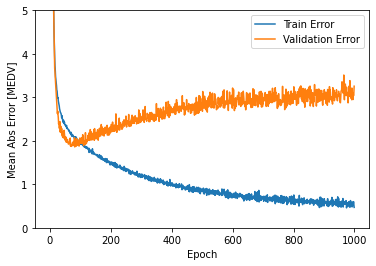

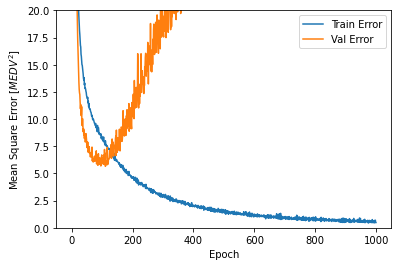

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


In [22]:
model = build_model()

In [23]:
# The patiance parameter is the amount of epochs to check the improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs= EPOCHS,
                   validation_split=0.2, verbose=1, callbacks=[early_stop, PrintDot()])

Epoch 1/1000
9/9 [==============================] - 0s 13ms/step - loss: 514.0951 - mae: 21.0088 - mse: 514.0951 - mape: 95.0275 - val_loss: 588.5272 - val_mae: 22.2430 - val_mse: 588.5272 - val_mape: 89.2776

.Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 441.9222 - mae: 19.2075 - mse: 441.9222 - mape: 85.1310 - val_loss: 512.0033 - val_mae: 20.5545 - val_mse: 512.0033 - val_mape: 81.6516
.Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 371.2026 - mae: 17.2964 - mse: 371.2026 - mape: 75.1146 - val_loss: 430.3023 - val_mae: 18.8047 - val_mse: 430.3023 - val_mape: 75.9198
.Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 298.3380 - mae: 15.2568 - mse: 298.3380 - mape: 65.7377 - val_loss: 343.9843 - val_mae: 16.7522 - val_mse: 343.9843 - val_mape: 69.3919
.Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 226.4891 - mae: 13.1039 - mse: 226.4891 - mape: 57.0732 - val_loss: 260.0944 - val_mae: 14

9/9 [==============================] - 0s 3ms/step - loss: 13.4933 - mae: 2.4768 - mse: 13.4933 - mape: 12.1502 - val_loss: 10.2524 - val_mae: 2.3854 - val_mse: 10.2524 - val_mape: 12.5067
.Epoch 42/1000
9/9 [==============================] - 0s 2ms/step - loss: 13.1540 - mae: 2.4790 - mse: 13.1540 - mape: 12.2606 - val_loss: 9.9724 - val_mae: 2.3754 - val_mse: 9.9724 - val_mape: 12.1687
.Epoch 43/1000
9/9 [==============================] - 0s 4ms/step - loss: 13.2164 - mae: 2.4682 - mse: 13.2164 - mape: 12.1103 - val_loss: 8.8994 - val_mae: 2.1913 - val_mse: 8.8994 - val_mape: 11.7264
.Epoch 44/1000
9/9 [==============================] - 0s 3ms/step - loss: 12.9722 - mae: 2.4576 - mse: 12.9722 - mape: 12.0842 - val_loss: 9.1351 - val_mae: 2.2041 - val_mse: 9.1351 - val_mape: 11.7019
.Epoch 45/1000
9/9 [==============================] - 0s 3ms/step - loss: 13.0361 - mae: 2.4535 - mse: 13.0361 - mape: 12.0529 - val_loss: 9.4904 - val_mae: 2.3045 - val_mse: 9.4904 - val_mape: 11.9550
.Ep

.Epoch 82/1000
9/9 [==============================] - 0s 3ms/step - loss: 9.8213 - mae: 2.1897 - mse: 9.8213 - mape: 10.7189 - val_loss: 8.6093 - val_mae: 2.1775 - val_mse: 8.6093 - val_mape: 11.6978
.Epoch 83/1000
9/9 [==============================] - 0s 4ms/step - loss: 10.0446 - mae: 2.1745 - mse: 10.0446 - mape: 10.7272 - val_loss: 8.3150 - val_mae: 2.1315 - val_mse: 8.3150 - val_mape: 11.4529
.Epoch 84/1000
9/9 [==============================] - 0s 3ms/step - loss: 9.7455 - mae: 2.1573 - mse: 9.7455 - mape: 10.6213 - val_loss: 7.9638 - val_mae: 2.1075 - val_mse: 7.9638 - val_mape: 11.5571
.Epoch 85/1000
9/9 [==============================] - 0s 2ms/step - loss: 9.7793 - mae: 2.1839 - mse: 9.7793 - mape: 10.7734 - val_loss: 8.4676 - val_mae: 2.1464 - val_mse: 8.4676 - val_mape: 11.6796
.

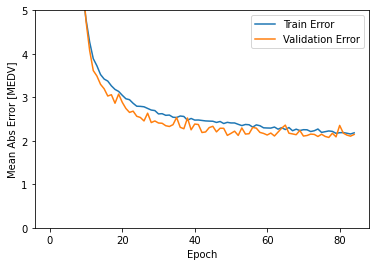

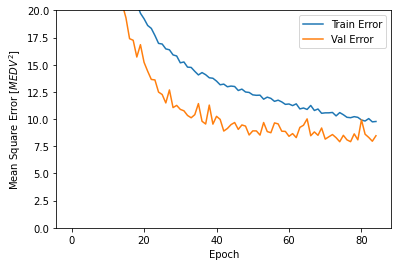

In [26]:
plot_history(history)